In [1]:
import sys

import tifffile
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0,'..')
from st_validate import periodic_kmeans, sta, visualize, utils


# np.warnings = warnings
g_sigmas = np.linspace(start=0.15, stop=2.5, num=10)
w_sigmas = np.linspace(start=0.0, stop=5.0, num=10)

# 2D

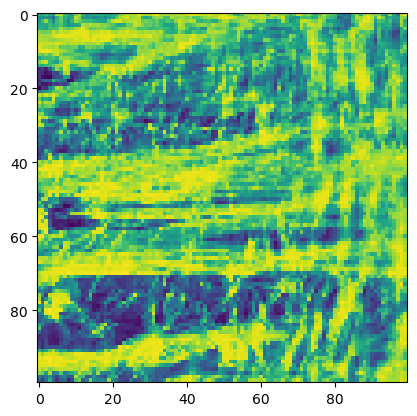

In [8]:
# load and visualize the 2d example image
I = tifffile.imread("../example_microscopy_data/two_angle_roi_2d_i_3930-4030_j_4730-4830.tif")
plt.figure()
plt.imshow(I)

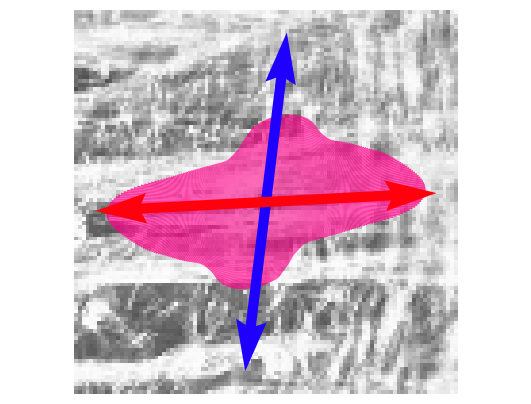

In [9]:
# set the gradient and window sigmas
g = 1
w = 1

# compute structure tensors and structure tensor angles
S = sta.structure_tensor(I, g, w)
angles = sta.angles(S)

# find the k-means of the angles with k=2
angles = np.where(angles < 0.0, angles + np.pi, angles) # angles must be in [0,pi] for clustering
mu = periodic_kmeans.periodic_kmeans(angles.flatten(), k=2, period=np.pi)

# compute arrow colors based on the mean angles
mean_colors = np.abs([np.sin(mu), np.zeros(len(mu)), np.cos(mu)]).T
mean_colors /= np.max(mean_colors, axis=1)[:,None]

# get the primary direction to color the histogram
single_mean = periodic_kmeans.periodic_mean(angles.flatten(), x = np.arange(180)*np.pi/180, period=np.pi)
color = np.abs([np.sin(single_mean), 0.0, np.cos(single_mean)])
color /= color.max()

# visualize the distrubution of structure tensor orientations
fig = visualize.plot_angles(I, angles=angles, means=mu, mean_colors=mean_colors, border_color=None, hist_color=color)

# 3D

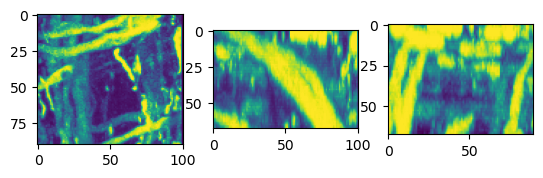

In [2]:
# load and visualize the 3d example image
J = tifffile.imread("../example_microscopy_data/two_angle_roi_3d_i_26-55_j_646-750_k_406-522.tif")
fig, ax = plt.subplots(1,3)
ax[0].imshow(J.max(0))
ax[1].imshow(J.max(1))
ax[2].imshow(J.max(2))

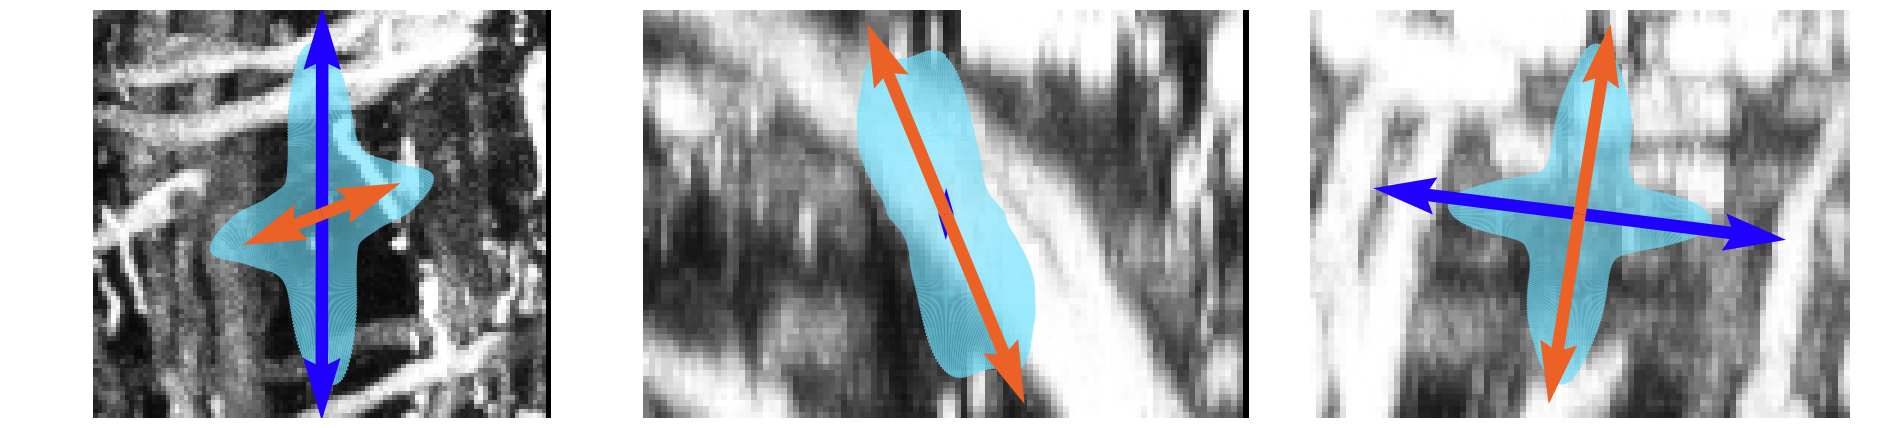

In [11]:
# set the gradient and window sigmas
g = 5.0
w = 2.0

# compute structure tensors and angles
S = sta.structure_tensor(J, derivative_sigma=g, tensor_sigma=w)
angles = sta.angles(S, cartesian=True) # set cartesian=True to output vectors for clustering.
# cluster the angles with spherical k-means, k=2 
means = periodic_kmeans.apsym_kmeans(angles.reshape(-1,3), k=2)

# get the primary direction to color the histogram
c = periodic_kmeans.apsym_kmeans(angles.reshape(-1,3), k=1)
c = np.abs(c)
c /= c.max()

# visualize the distrubution of structure tensor orientations
fig = visualize.plot_angles_3d(image=J, vectors=angles, means=means, mip=True, border_color=None, hist_color=c)